Connexion au Drive Google

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
data_path='/content/drive/MyDrive/python/photo'

Lister les sous-dossiers qui retourne la liste des fichiers dans le dossier path

In [22]:
import os
os.listdir(data_path)

['khalil', '.ipynb_checkpoints', 'wajih']

In [26]:
classe_0_path=os.path.join(data_path,'khalil') 

In [27]:
classe_0_path

'/content/drive/MyDrive/python/photo/khalil'

Lister les noms des fichiers dans le dossier classe_0_path ?

Nommer la liste obtenue fichiers

In [28]:
fichiers=os.listdir(classe_0_path)

In [29]:
fichiers

['KT01.jpg', 'KT02.jpg', 'KT03.jpg']

La liste obtenue contizent des noms des fichiers d'images dans le dossier classe_0_path.

Composer le chemin de la première image de la liste fichiers

Lui donner le nom image_path

In [35]:
image_path=os.path.join(classe_0_path, fichiers[0]) 
image_path

'/content/drive/MyDrive/python/photo/khalil/KT01.jpg'

**1.2. Travailler avec les images**

Lire une image

Note: Utiliser la fonction imread() de module skimage.io

Donner le nom I à ll'image chargée en mémoire

In [50]:
from skimage.io import imread

I=imread(image_path)


Propriétés de l'objet image

Afficher le type de l'image chargée en mémoire I

In [37]:
type(I)

numpy.ndarray

Afficher le shape de l'image chargée en mémoire I

In [38]:
I.shape

(720, 1280, 3)

Afficher le type des données (les niveaux de gris) de l'image I

In [39]:
I.dtype

dtype('uint8')

Afficher une image sur la console

Note :  Utiliser la fonction imshow(image, cmap='gray') de module matplotlib.pyplot

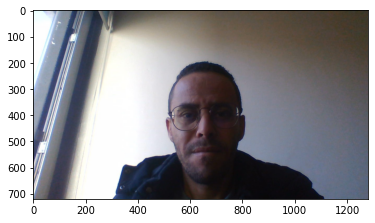

In [40]:
import matplotlib.pyplot as plt

plt.imshow(I, cmap='gray')

Opérations de base sur une image

In [43]:
# rendre l'image un vecteur avec la fonction reshape()
import numpy as np
I1 = np.reshape(I,(720,1280,3))

In [44]:
# rendre l'image un vecteur avec la fonction reshape()
I1

array([[[237, 255, 255],
        [237, 255, 255],
        [237, 255, 255],
        ...,
        [ 63,  53,  26],
        [ 61,  51,  24],
        [ 61,  52,  23]],

       [[237, 255, 255],
        [237, 255, 255],
        [237, 255, 255],
        ...,
        [ 63,  53,  26],
        [ 61,  51,  24],
        [ 61,  51,  24]],

       [[237, 255, 255],
        [237, 255, 255],
        [237, 255, 255],
        ...,
        [ 63,  53,  28],
        [ 61,  51,  26],
        [ 61,  51,  26]],

       ...,

       [[143, 196, 236],
        [135, 184, 224],
        [ 87, 129, 167],
        ...,
        [ 92,  98, 122],
        [ 91,  95, 120],
        [ 89,  93, 118]],

       [[131, 180, 223],
        [124, 169, 210],
        [102, 141, 180],
        ...,
        [ 90,  96, 122],
        [ 89,  93, 120],
        [ 87,  91, 118]],

       [[121, 168, 212],
        [116, 159, 201],
        [113, 151, 190],
        ...,
        [ 89,  93, 120],
        [ 87,  91, 118],
        [ 85,  89, 116]]

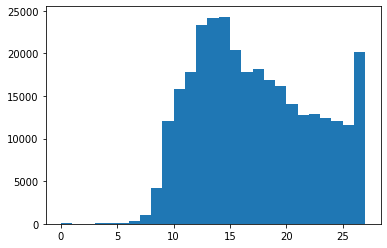

In [46]:
# rendre l'image un vecteur avec la fonction flatten()
x, y, patches = plt.hist(I1.flatten(), bins=range(28))
plt.show()


720 384


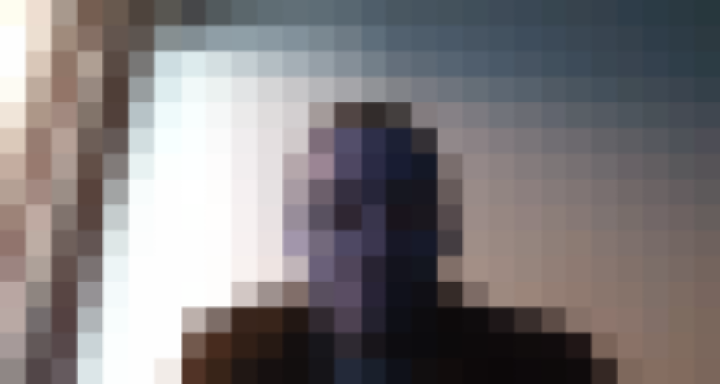

In [66]:
# Changer la resolution de l'image
# Utiliser la fonction resize
import imutils
import cv2
from google.colab.patches import cv2_imshow
from skimage.transform import resize
I1 = imutils.resize(I1, width=720)
(h, w) = I1.shape[:2]
print(w,h)
cv2_imshow(I1)


**2. Classification des images**

**2.1. Charger les images à partir de Google Drive**

In [76]:
import os

data_path='/content/drive/MyDrive/python/photo/khalil'
images=[]
labels=[]
for classe_name in os.listdir(data_path):
  classe_path = os.path.join(data_path, classe_name)
  for file in os.listdir(classe_0_path):
    image_path = os.path.join(classe_0_path, file)
    images.append(image_path)
    labels.append(classe_name)

**2.2. Diviser les données en entrée et sortie**

In [77]:
X=images
y=labels

**2.3. Diviser les données en train et test**

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.6, stratify=y)

**2.4. Traitement des données de train d'entrée**

In [79]:
from skimage.io import imread
import numpy as np
X_train_=[]
for image_path in X_train:
  I=imread(image_path)
  x=I.flatten()
  X_train_.append(x)
X_train_=np.array(X_train_)
X_train_

array([[227, 255, 254, ...,  82,  91, 124],
       [223, 252, 255, ...,  81,  92, 112],
       [227, 255, 254, ...,  82,  91, 124],
       [237, 255, 255, ...,  85,  89, 116],
       [237, 255, 255, ...,  85,  89, 116]], dtype=uint8)

**2.5. Apprentissage de classifieur**

Apprendre le modèle KNN avec X_train_ et y_train

In [80]:
from sklearn.neighbors  import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_,y_train)

KNeighborsClassifier(n_neighbors=2)

**2.6. Traitement des données de test d'entrée**

In [88]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


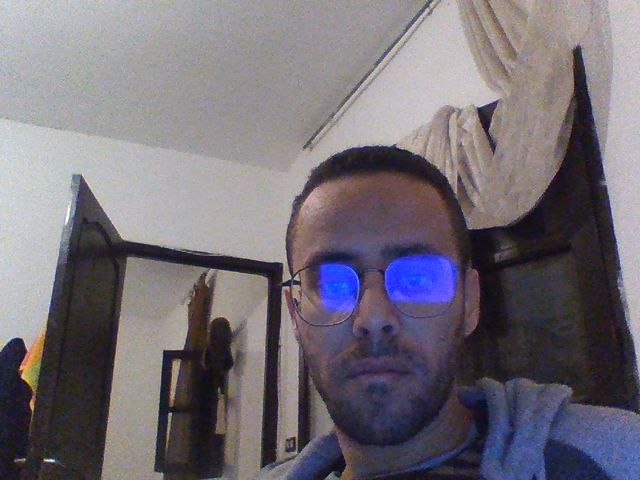

In [89]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [105]:
from skimage.io import imread
import numpy as np
X_test_=[]
for image_path in X_test:
  I=imread(image_path)
  x=I.flatten()
  X_test_.append(x)
X_test_=np.array(X_test_)
X_test_

array([[223, 252, 255, ...,  81,  92, 112],
       [237, 255, 255, ...,  85,  89, 116],
       [223, 252, 255, ...,  81,  92, 112],
       [227, 255, 254, ...,  82,  91, 124]], dtype=uint8)

**2.7. Evaluation du classifieur**

Prédire les labels y_test_predicted à partir des données de test X_test_

In [106]:
y_test_predicted=knn.predict(X_test_)
y_test_predicted

array(['KT02.jpg', 'KT01.jpg', 'KT02.jpg', 'KT01.jpg'], dtype='<U8')

Afficher les mesures de performance

Score accurracy

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("accuracy=%.2f" % (accuracy_score(y_test, y_test_predicted)*100))

accuracy=25.00


Matrice de confusion

In [108]:
M=confusion_matrix(y_test, y_test_predicted)
M

array([[0, 1, 0],
       [1, 1, 0],
       [1, 0, 0]])

In [109]:
knn.classes_

array(['KT01.jpg', 'KT02.jpg', 'KT03.jpg'], dtype='<U8')

In [110]:
import pandas as pd

pd.DataFrame(M,
             index=knn.classes_,
             columns=knn.classes_)

,KT01.jpg,KT02.jpg,KT03.jpg
KT01.jpg,0,1,0
KT02.jpg,1,1,0
KT03.jpg,1,0,0


Rappel (recall) et précision apr classe

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

    KT01.jpg       0.00      0.00      0.00         1
    KT02.jpg       0.50      0.50      0.50         2
    KT03.jpg       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.17      0.17      0.17         4
weighted avg       0.25      0.25      0.25         4



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
